# **Preprocessing Pipeline**

In [1]:
# Imports
import librosa
import numpy as np
import soundfile as sf
from scipy.signal import fftconvolve

import matplotlib.pyplot as plt

## **1. Synchronization of recorded audio files**

In [ ]:
# Load and synchronize audio files
audio_pi1, sr1 = librosa.load("../Data/raw/output_2024-10-17_171402.158245.wav", sr=None)
print("Pi1 audio loaded.")

audio_pi2, sr2 = librosa.load("../Data/raw/Valentin2.wav", sr=None)
print("Pi2 audio loaded.")


# Load and synchronize anomalous audio files
Aaudio_pi1, sr1 = librosa.load("../Data/raw/pi1_Aaudio.wav", sr=None)
print("Pi1 Aaudio loaded.")

Aaudio_pi2, sr2 = librosa.load("../Data/raw/pi2_Aaudio.wav", sr=None)
print("Pi2 Aaudio loaded.")

In [8]:
# Ensure the sample rates match
if sr1 != sr2:
    raise ValueError("Sample rates of the two files do not match")

# Trim silence
print("Trimming silence from both audio files...")
audio_pi1, _ = librosa.effects.trim(audio_pi1)
audio_pi2, _ = librosa.effects.trim(audio_pi2)
Aaudio_pi1, _ = librosa.effects.trim(Aaudio_pi1)
Aaudio_pi2, _ = librosa.effects.trim(Aaudio_pi2)

# Synchronize normal audio files
print("Computing cross-correlation for normal recordings...")
correlation_normal = fftconvolve(audio_pi1, audio_pi2[::-1], mode='full')
lag_normal = np.argmax(correlation_normal) - len(audio_pi2)
print(f"Detected delay for normal recordings: {lag_normal / sr1} seconds")

# Align normal audio files based on the lag
print("Aligning normal audio files...")
if lag_normal > 0:
    aligned_pi1 = audio_pi1[lag_normal:]
    aligned_pi2 = audio_pi2
else:
    aligned_pi1 = audio_pi1
    aligned_pi2 = audio_pi2[-lag_normal:]

min_length_normal = min(len(aligned_pi1), len(aligned_pi2))
aligned_pi1 = aligned_pi1[:min_length_normal]
aligned_pi2 = aligned_pi2[:min_length_normal]

# Save aligned normal audio files
#sf.write("aligned_pi1.wav", aligned_pi1, sr1)
#sf.write("aligned_pi2.wav", aligned_pi2, sr1)

# Synchronize anomalous audio files
print("Computing cross-correlation for anomalous recordings...")
correlation_anomalous = fftconvolve(Aaudio_pi1, Aaudio_pi2[::-1], mode='full')
lag_anomalous = np.argmax(correlation_anomalous) - len(Aaudio_pi2)
print(f"Detected delay for anomalous recordings: {lag_anomalous / sr1} seconds")

# Align anomalous audio files based on the lag
print("Aligning anomalous audio files...")
if lag_anomalous > 0:
    aligned_Api1 = Aaudio_pi1[lag_anomalous:]
    aligned_Api2 = Aaudio_pi2
else:
    aligned_Api1 = Aaudio_pi1
    aligned_Api2 = Aaudio_pi2[-lag_anomalous:]

min_length_anomalous = min(len(aligned_Api1), len(aligned_Api2))
aligned_Api1 = aligned_Api1[:min_length_anomalous]
aligned_Api2 = aligned_Api2[:min_length_anomalous]

# Save aligned anomalous audio files
#sf.write("aligned_Api1.wav", aligned_Api1, sr1)
#sf.write("aligned_Api2.wav", aligned_Api2, sr1)

print("All processing and saving completed.")

Trimming silence from both audio files...
Computing cross-correlation for normal recordings...
Detected delay for normal recordings: -35.20156462585034 seconds
Aligning normal audio files...
Computing cross-correlation for anomalous recordings...
Detected delay for anomalous recordings: 40.390249433106575 seconds
Aligning anomalous audio files...
All processing and saving completed.


In [9]:
# Save the aligned normal audio files
print("Saving aligned normal audio files...")
sf.write("../Data/aligned/aligned_pi1.wav", aligned_pi1, sr1)
sf.write("../Data/aligned/aligned_pi2.wav", aligned_pi2, sr1)

# Save a stereo version of the aligned normal audio
combined_audio_normal = np.vstack((aligned_pi1, aligned_pi2))
sf.write("../Data/aligned/aligned_stereo_normal.wav", combined_audio_normal.T, sr1)

# Save the aligned anomalous audio files
print("Saving aligned anomalous audio files...")
sf.write("../Data/aligned/aligned_Api1.wav", aligned_Api1, sr1)
sf.write("../Data/aligned/aligned_Api2.wav", aligned_Api2, sr1)

# Save a stereo version of the aligned anomalous audio
combined_audio_anomalous = np.vstack((aligned_Api1, aligned_Api2))
sf.write("../Data/aligned/aligned_stereo_anomalous.wav", combined_audio_anomalous.T, sr1)

print("Processing and saving completed for all audio files.")

Saving aligned normal audio files...
Saving aligned anomalous audio files...
Processing and saving completed for all audio files.


## **2. Transformations (STFT & MEL)**

In [15]:
# Paths to your audio files in the aligned folder
audio_pi1_path = "../Data/raw/08_livetest_knackgeräusch/output_MIC1_2024-11-07_13-55-00_065414.wav"
audio_pi2_path = "../Data/raw/08_livetest_knackgeräusch/output_MIC1_2024-11-07_13-55-00_065414.wav"
audio_pi3_path = "../Data/raw/08_livetest_knackgeräusch/output_MIC3_2024-11-07_13-55-04_968247.wav"
audio_pi4_path = "../Data/raw/08_livetest_knackgeräusch/output_MIC4_2024-11-07_13-55-03_269113.wav"

# Load aligned audio files
aligned_pi1, sr1 = librosa.load(audio_pi1_path, sr=None)
print("Aligned Pi1 audio loaded.")

aligned_pi2, sr2 = librosa.load(audio_pi2_path, sr=None)
print("Aligned Pi2 audio loaded.")

aligned_pi3, sr3 = librosa.load(audio_pi3_path, sr=None)
print("Aligned Pi3 audio loaded.")

aligned_pi4, sr4 = librosa.load(audio_pi4_path, sr=None)
print("Aligned Pi4 audio loaded.")

Aligned Pi1 audio loaded.
Aligned Pi2 audio loaded.
Aligned Pi3 audio loaded.
Aligned Pi4 audio loaded.


In [16]:
# Apply STFT (Short-term Fourier Transform) for all files
print("Applying Short-term Fourier Transform (STFT)...")
stft_pi1 = librosa.stft(aligned_pi1, n_fft=1024, hop_length=512)
stft_pi2 = librosa.stft(aligned_pi2, n_fft=1024, hop_length=512)
stft_pi3 = librosa.stft(aligned_pi3, n_fft=1024, hop_length=512)
stft_pi4 = librosa.stft(aligned_pi4, n_fft=1024, hop_length=512)

Applying Short-term Fourier Transform (STFT)...


In [17]:
# Convert to Mel-spectrogram
print("Converting to Mel-spectrogram...")
mel_pi1 = librosa.feature.melspectrogram(S=np.abs(stft_pi1), sr=sr1, n_mels=128)
mel_pi2 = librosa.feature.melspectrogram(S=np.abs(stft_pi2), sr=sr2, n_mels=128)
mel_pi3 = librosa.feature.melspectrogram(S=np.abs(stft_pi3), sr=sr3, n_mels=128)
mel_pi4 = librosa.feature.melspectrogram(S=np.abs(stft_pi4), sr=sr4, n_mels=128)

# Convert Mel-spectrogram to dB scale
print("Converting Mel-spectrogram to dB scale...")
mel_db_pi1 = librosa.power_to_db(mel_pi1, ref=np.max)
mel_db_pi2 = librosa.power_to_db(mel_pi2, ref=np.max)
mel_db_pi3 = librosa.power_to_db(mel_pi3, ref=np.max)
mel_db_pi4 = librosa.power_to_db(mel_pi4, ref=np.max)

# Normalize the mel-spectrograms (optional)
print("Normalizing Mel-spectrograms...")
mel_db_pi1 = (mel_db_pi1 - np.mean(mel_db_pi1)) / np.std(mel_db_pi1)
mel_db_pi2 = (mel_db_pi2 - np.mean(mel_db_pi2)) / np.std(mel_db_pi2)
mel_db_pi3 = (mel_db_pi3 - np.mean(mel_db_pi3)) / np.std(mel_db_pi3)
mel_db_pi4 = (mel_db_pi4 - np.mean(mel_db_pi4)) / np.std(mel_db_pi4)

# Save Mel-spectrograms as numpy arrays for future use
print("Saving Mel-spectrograms...")
np.save("../Data/mel/mel_db_pi1.npy", mel_db_pi1)
np.save("../Data/mel/mel_db_pi2.npy", mel_db_pi2)
np.save("../Data/mel/mel_db_pi3.npy", mel_db_pi3)
np.save("../Data/mel/mel_db_pi4.npy", mel_db_pi3)

Converting to Mel-spectrogram...
Converting Mel-spectrogram to dB scale...
Normalizing Mel-spectrograms...
Saving Mel-spectrograms...


In [ ]:
import matplotlib.pyplot as plt
import librosa.display
import numpy as np
from matplotlib import ticker

# Create a single plot
fig, ax = plt.subplots(figsize=(10, 6))

# Plot Normal Pi1
img1 = librosa.display.specshow(mel_db_pi1, sr=sr1, x_axis='time', y_axis='mel', cmap='viridis', ax=ax)
ax.set(title='Mel-Spectrogram Mic3 8000Hz 14-28', xlabel='Time (s)', ylabel='Frequency (Hz)')

# Set the x-axis to display only specified part of spectrogram (in seconds)
ax.set_xlim([14, 28])

# Define a custom function to format the x-axis labels with MM:SS only at the beginning of each minute
def format_time(x, pos):
    minutes = int(x // 60)
    seconds = int(x % 60)
    # Show "MM:SS" at the start of each new displayed minute, then only seconds
    if x == ax.get_xlim()[0] or seconds == 0:
        return f"{minutes:02d}:{seconds:02d}"
    else:
        return f"{seconds:02d}"

# Apply the formatter to the x-axis
ax.xaxis.set_major_locator(ticker.MultipleLocator(1))  # Set ticks at every 1 second
ax.xaxis.set_major_formatter(ticker.FuncFormatter(format_time))

# Set color bar for dB scale
fig.colorbar(img1, ax=ax, format='%+2.0f dB')

# Adjust layout
plt.tight_layout()
plt.savefig('../Data/mel/mel_spectrogram_mic3_ex_4_8000.png')
plt.show()

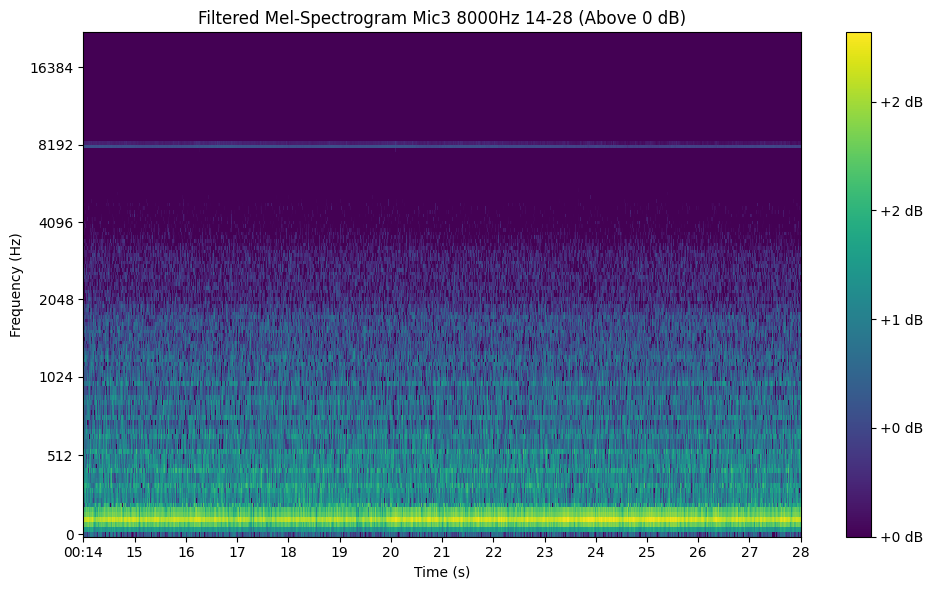

In [12]:
# Filter to display only sounds above +0 dB
fig, ax = plt.subplots(figsize=(10, 6))

# Adjust the minimum dB level displayed by the color map
img2 = librosa.display.specshow(mel_db_pi1, sr=sr1, x_axis='time', y_axis='mel', cmap='viridis', ax=ax, vmin=0)

# Set title, labels, and x-axis limits
ax.set(title='Filtered Mel-Spectrogram Mic3 8000Hz 14-28 (Above 0 dB)', xlabel='Time (s)', ylabel='Frequency (Hz)')
ax.set_xlim([14, 28])

# Apply the custom x-axis formatter
ax.xaxis.set_major_locator(ticker.MultipleLocator(1))
ax.xaxis.set_major_formatter(ticker.FuncFormatter(format_time))

# Set color bar for dB scale
fig.colorbar(img2, ax=ax, format='%+2.0f dB')

# Adjust layout and show the plot
plt.tight_layout()
plt.savefig('../Data/mel/mel_spectrogram_mic3_ex_4_8000_filtered.png')
plt.show()

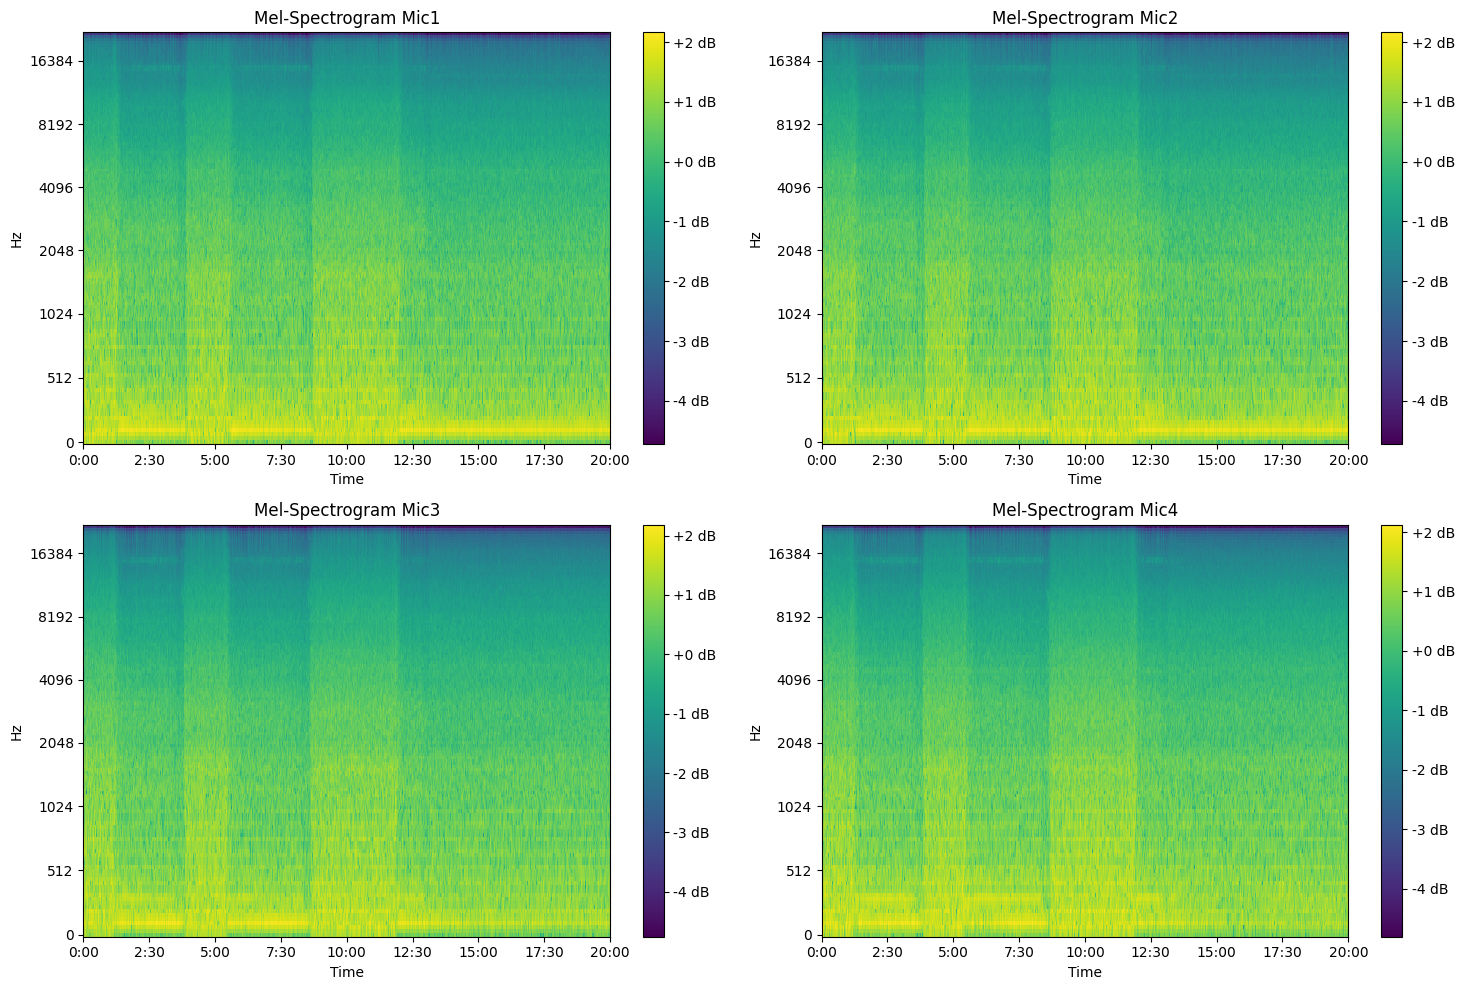

In [19]:
# Create a figure for the subplots
fig, axs = plt.subplots(2, 2, figsize=(15, 10))

# Plot Mic1
img1 = librosa.display.specshow(mel_db_pi1, sr=sr1, x_axis='time', y_axis='mel', cmap='viridis', ax=axs[0, 0])
axs[0, 0].set(title='Mel-Spectrogram Mic1')
fig.colorbar(img1, ax=axs[0, 0], format='%+2.0f dB')

# Plot Mic2
img2 = librosa.display.specshow(mel_db_pi2, sr=sr2, x_axis='time', y_axis='mel', cmap='viridis', ax=axs[0, 1])
axs[0, 1].set(title='Mel-Spectrogram Mic2')
fig.colorbar(img2, ax=axs[0, 1], format='%+2.0f dB')

# Plot Mic3
img3 = librosa.display.specshow(mel_db_pi3, sr=sr3, x_axis='time', y_axis='mel', cmap='viridis', ax=axs[1, 0])
axs[1, 0].set(title='Mel-Spectrogram Mic3')
fig.colorbar(img3, ax=axs[1, 0], format='%+2.0f dB')

# Plot Mic4
img4 = librosa.display.specshow(mel_db_pi4, sr=sr4, x_axis='time', y_axis='mel', cmap='viridis', ax=axs[1, 1])
axs[1, 1].set(title='Mel-Spectrogram Mic4')
fig.colorbar(img4, ax=axs[1, 1], format='%+2.0f dB')

# Adjust layout
plt.tight_layout()
plt.savefig('../Data/mel/mel_spectrograms_comparison.png')
plt.show()

## **3. Frame Generation**

In [26]:
def generate_frames(mel_spectrogram, frame_size=128, hop_size=64):
    num_frames = (mel_spectrogram.shape[1] - frame_size) // hop_size + 1
    frames = np.zeros((num_frames, mel_spectrogram.shape[0], frame_size))

    for i in range(num_frames):
        start = i * hop_size
        frames[i] = mel_spectrogram[:, start:start + frame_size]

    return frames

# Generate frames for normal Pi1 and Pi2
frames_pi1 = generate_frames(mel_db_pi1)
frames_pi2 = generate_frames(mel_db_pi2)

# Generate frames for anomalous Pi1 and Pi2
frames_Api1 = generate_frames(mel_db_Api1)
frames_Api2 = generate_frames(mel_db_Api2)

print(f"Frames Pi1 (Normal): {frames_pi1.shape}")
print(f"Frames Pi2 (Normal): {frames_pi2.shape}")
print(f"Frames Api1 (Anomalous): {frames_Api1.shape}")
print(f"Frames Api2 (Anomalous): {frames_Api2.shape}")

Frames Pi1 (Normal): (241, 128, 128)
Frames Pi2 (Normal): (241, 128, 128)
Frames Api1 (Anomalous): (230, 128, 128)
Frames Api2 (Anomalous): (230, 128, 128)
